Create a concentric square image, with inner square pixel intensity values as 125 and outer square as 0 everywhere. Find the projection along the row, column, diagonal with 45 degree and 135 degree. Reconstruct the image by applying back projection algorithm using the following ways
1. the row projection only 
2. the row and column projections 
3. the row and column and diagonal 45 degree projections 
4. the row and column and diagonal 45 and 135 degree projections 

In [63]:
from collections import defaultdict
import numpy as np

# This class represents a directed graph
# using adjacency matrix representation
class Graph:

	def __init__(self, graph):
		self.graph = graph # residual graph
		self. ROW = len(graph)
		# self.COL = len(gr[0])

	'''Returns true if there is a path from source 's' to sink 't' in
	residual graph. Also fills parent[] to store the path '''

	def BFS(self, s, t, parent):

		# Mark all the vertices as not visited
		visited = [False]*(self.ROW)

		# Create a queue for BFS
		queue = []

		# Mark the source node as visited and enqueue it
		queue.append(s)
		visited[s] = True

		# Standard BFS Loop
		while queue:

			# Dequeue a vertex from queue and print it
			u = queue.pop(0)

			# Get all adjacent vertices of the dequeued vertex u
			# If a adjacent has not been visited, then mark it
			# visited and enqueue it
			for ind, val in enumerate(self.graph[u]):
				if visited[ind] == False and val > 0:
					# If we find a connection to the sink node,
					# then there is no point in BFS anymore
					# We just have to set its parent and can return true
					queue.append(ind)
					visited[ind] = True
					parent[ind] = u
					if ind == t:
						return True

		# We didn't reach sink in BFS starting
		# from source, so return false
		return False
			
	
	# Returns the maximum flow from s to t in the given graph
	def FordFulkerson(self, source, sink):

		# This array is filled by BFS and to store path
		parent = [-1]*(self.ROW)

		max_flow = 0 # There is no flow initially

		# Augment the flow while there is path from source to sink
		while self.BFS(source, sink, parent) :

			# Find minimum residual capacity of the edges along the
			# path filled by BFS. Or we can say find the maximum flow
			# through the path found.
			path_flow = float("Inf")
			s = sink
			while(s != source):
				path_flow = min (path_flow, self.graph[parent[s]][s])
				s = parent[s]

			# Add path flow to overall flow
			max_flow += path_flow

			# update residual capacities of the edges and reverse edges
			# along the path
			v = sink
			while(v != source):
				u = parent[v]
				self.graph[u][v] -= path_flow
				self.graph[v][u] += path_flow
				v = parent[v]

	
		for i in range(self.ROW):
			print(self.graph[i])
		
		return self.graph
		

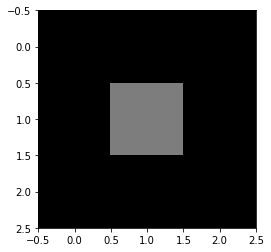

In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image 

array=np.array([[0,0,0],
                [0,125,0],
                [0,0,0]])
image=Image.fromarray(array)
plt.title("Original Image")
plt.imshow(image,cmap='gray')

[  0 125   0]


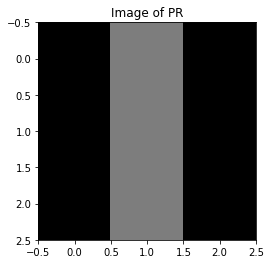

In [73]:
rowprojection=np.sum(array,axis=1)
print(rowprojection)
rowT=np.transpose(rowprojection)
rowprojection_img=np.array([rowT,rowT,rowT])
rowImage=Image.fromarray(rowprojection_img)
plt.title("Image of PR")
plt.imshow(rowImage,cmap='gray')


In [66]:
rowprojection=np.sum(array,axis=1)
print(rowprojection)
colprojection=np.sum(array,axis=0)
print(colprojection)

[  0 125   0]
[  0 125   0]


In [67]:
graph=(8,8)
graph=np.zeros(graph,dtype=int)
graph[0][1]=rowprojection[0]
graph[0][2]=rowprojection[1]
graph[0][3]=rowprojection[2]

graph[4][7]=colprojection[0]
graph[5][7]=colprojection[1]
graph[6][7]=colprojection[2]

for i in range(4,7):
    for j in range(1,4):
        graph[j][i]=125
    


print(graph)

[[  0   0 125   0   0   0   0   0]
 [  0   0   0   0 125 125 125   0]
 [  0   0   0   0 125 125 125   0]
 [  0   0   0   0 125 125 125   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 125]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


[0 0 0 0 0 0 0 0]
[  0   0   0   0 125 125 125   0]
[125   0   0   0 125   0 125   0]
[  0   0   0   0 125 125 125   0]
[0 0 0 0 0 0 0 0]
[  0   0 125   0   0   0   0   0]
[0 0 0 0 0 0 0 0]
[  0   0   0   0   0 125   0   0]
Matrix [[  0   0   0 125 125 125]
 [  0   0   0 125   0 125]
 [  0   0   0 125 125 125]
 [  0   0   0   0   0   0]
 [  0 125   0   0   0   0]
 [  0   0   0   0   0   0]]
image [[  0   0   0]
 [  0 125   0]
 [  0   0   0]]


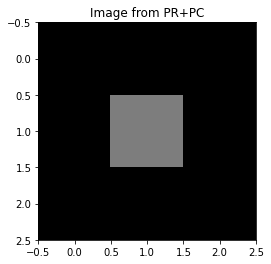

In [72]:
g = Graph(graph)
source = 0; sink = 7
residual=g.FordFulkerson(source, sink)
residual=np.array(residual)
matrix=residual[1:7,1:7]
print("Matrix",matrix)

image=np.transpose(matrix[3:6,0:3])
print("image",image)
image=np.array(image)
image=Image.fromarray(image)
plt.title("Image from PR+PC")
plt.imshow(image,cmap='gray')

In [ ]:
colprojection=np.sum(array,axis=0)
colprojection_img=np.array([colprojection,colprojection,colprojection,colprojection])
colimage=Image.fromarray(colprojection_img)
plt.imshow(colimage,cmap='gray')

In [76]:
projection45deg = []
for i in range(-2,3):
        projection45deg.append(np.trace(array,i))

print(projection45deg)

[0, 0, 125, 0, 0]


[0, 0, 0, 125, 0, 0, 0]


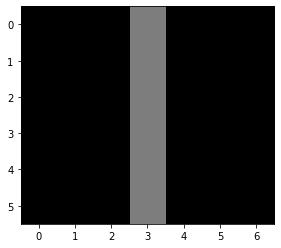

In [70]:
projection135deg = []
for i in range(3,-4,-1):	
        projection135deg.append(np.trace(array,i))

print(projection135deg)
projection135deg_img=np.array([projection135deg,projection135deg,projection135deg,
                                projection135deg,projection135deg,projection135deg])
pro135image=Image.fromarray(projection135deg_img)
plt.imshow(pro135image,cmap='gray')

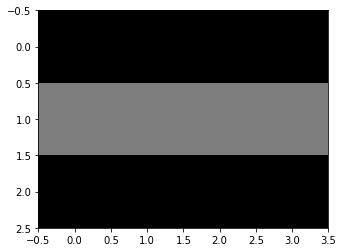

NameError: name 'colprojection_img' is not defined

In [71]:
#Ques1

#pr
plt.imshow(rowimage,cmap='gray')
plt.show()

#pr_pc
pr_pc=rowprojection_img+colprojection_img
plt.imshow(pr_pc,cmap='gray')
plt.show()

#pr_pc_p45
rowprojection_img=np.pad(rowprojection_img,1,'constant',constant_values=0)
#add a zero row on top
rowprojection_img=np.insert(rowprojection_img,0,0,axis=0)
#add a zero column on right
rowprojection_img=np.insert(rowprojection_img,5,0,axis=1)
print(rowprojection_img)
print(rowprojection_img.shape)

colprojection_img=np.pad(colprojection_img,1,'constant',constant_values=0)
#add a zero row on top
colprojection_img=np.insert(colprojection_img,0,0,axis=0)
#add a zero column on right
colprojection_img=np.insert(colprojection_img,5,0,axis=1)
print(colprojection_img)
print(colprojection_img.shape)
print(projection45deg_img.shape)

pr_pc_p45=rowprojection_img+colprojection_img+projection45deg_img
plt.imshow(pr_pc_p45,cmap='gray')
plt.show()

#pr_pc_p45_p135

pr_pc_p45_p135=rowprojection_img+colprojection_img+projection45deg_img+projection135deg_img
plt.imshow(pr_pc_p45_p135,cmap='gray')
plt.show()


In [ ]:
# Python program for implementation
# of Ford Fulkerson algorithm
from collections import defaultdict

# This class represents a directed graph
# using adjacency matrix representation
class Graph:

	def __init__(self, graph):
		self.graph = graph # residual graph
		self. ROW = len(graph)
		# self.COL = len(gr[0])

	'''Returns true if there is a path from source 's' to sink 't' in
	residual graph. Also fills parent[] to store the path '''

	def BFS(self, s, t, parent):

		# Mark all the vertices as not visited
		visited = [False]*(self.ROW)

		# Create a queue for BFS
		queue = []

		# Mark the source node as visited and enqueue it
		queue.append(s)
		visited[s] = True

		# Standard BFS Loop
		while queue:

			# Dequeue a vertex from queue and print it
			u = queue.pop(0)

			# Get all adjacent vertices of the dequeued vertex u
			# If a adjacent has not been visited, then mark it
			# visited and enqueue it
			for ind, val in enumerate(self.graph[u]):
				if visited[ind] == False and val > 0:
					# If we find a connection to the sink node,
					# then there is no point in BFS anymore
					# We just have to set its parent and can return true
					queue.append(ind)
					visited[ind] = True
					parent[ind] = u
					if ind == t:
						return True

		# We didn't reach sink in BFS starting
		# from source, so return false
		return False
			
	
	# Returns the maximum flow from s to t in the given graph
	def FordFulkerson(self, source, sink):

		# This array is filled by BFS and to store path
		parent = [-1]*(self.ROW)

		max_flow = 0 # There is no flow initially

		# Augment the flow while there is path from source to sink
		while self.BFS(source, sink, parent) :

			# Find minimum residual capacity of the edges along the
			# path filled by BFS. Or we can say find the maximum flow
			# through the path found.
			path_flow = float("Inf")
			s = sink
			while(s != source):
				path_flow = min (path_flow, self.graph[parent[s]][s])
				s = parent[s]

			# Add path flow to overall flow
			max_flow += path_flow

			# update residual capacities of the edges and reverse edges
			# along the path
			v = sink
			while(v != source):
				u = parent[v]
				self.graph[u][v] -= path_flow
				self.graph[v][u] += path_flow
				v = parent[v]

    
		for i in range(self.ROW):
            print(self.graph[i])
        


# Create a graph given in the above diagram

graph =[[0,	2,	2	,1	,0	,0	,0	,0],
    	[0,	0,	0	,0	,1	,3	,1	,0],
        [0,	0,	0	,0	,1	,1	,1	,0],
        [0,	0,	0	,0	,1	,1	,1	,0],
        [0,	0,	0	,0	,0	,0	,0	,1],
        [0,	0,	0	,0	,0	,0	,0	,3],
        [0,	0,	0	,0	,0	,0	,0	,1],
        [0,	0,	0	,0	,0	,0	,0	,0]]

g = Graph(graph)

source = 0; sink = 7

print ("The maximum possible flow is  " ,g.FordFulkerson(source, sink))

# This code is contributed by Neelam Yadav